# LDA - Sentimento em relação ao aquecimento global



## Leitura e análise inicial dos dados

Inicializar um DataFrame a partir do arquivo `../data//twitter/twitter_sentiment_data_cleaned.csv`

In [1]:
# Resposta:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lda_over_time.lda_over_time import LdaOverTime
from lda_over_time.models.lda_seq_model import LdaSeqModel

from lda_over_time.models.temporal_lda_model import TemporalLdaModel

import lda_over_time

tweets_path = "../data/twitter/twitter_sentiment_data_cleaned.csv"

data = pd.read_csv(
    tweets_path, 
    usecols=["DATE", "MESSAGE"], 
    encoding="latin-1"
)

data

c:\Users\thiag\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


,MESSAGE,DATE
0,@tiniebeany climate change is an interesting h...,2016-10-31 03:13:07.701
1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,2016-10-31 16:15:22.218
2,Fabulous! Leonardo #DiCaprio's film on #climat...,2016-10-31 16:16:07.725
3,RT @Mick_Fanning: Just watched this amazing do...,2016-10-31 16:17:03.392
4,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",2016-10-31 16:19:07.444
...,...,...
43938,"Dear @realDonaldTrump,\nYeah right. Human Medi...",2016-10-26 15:54:32.840
43939,What will your respective parties do to preven...,2016-10-26 16:33:35.418
43940,RT @MikkiL: UN Poll Shows Climate Change Is th...,2016-10-26 19:15:07.538
43941,RT @taehbeingextra: i still can$q$t believe th...,2016-10-26 21:24:24.018


Utiliza o *spacy* para filtrar e limpar os textos

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [3]:
filters = {
    "ADJ": "adjective",
    "ADV": "adverb",
    "NOUN": "noun",
    "PROPN": "proper noun",
    "VERB": "verb",
}

In [7]:
import re
tweets = data['MESSAGE']

clean_tweets = []

for tweet in tweets:
    clean = []
    
    cleaned_tweet = re.sub('[^\x00-\x7F]+', '', tweet)
    cleaned_tweet = re.sub('RT|https:\/\/t.co\/\w+', '', tweet)
    
    for word in nlp(tweet):
        if word.pos_ in filters:
            clean.append(word.lemma_)
            
    # append cleanned text
    clean_tweets.append(' '.join(clean))

In [36]:
model = TemporalLdaModel(
    corpus = clean_tweets,         # list texts to be analysed
    dates = data["DATE"].values,     # dates of each article
    date_format = "%Y/%m/%d",        # date format is MM/DD/YYYY
    freq = "6M",                     # frequency of one semester
    n_topics = 5,                    # we want to get 5 topics
                        # calculate average of topics
)

In [37]:
main = LdaOverTime(model)

In [38]:
for topic_id in range(1, 4):
    print(
        main.get_topic_words(
            topic_id=topic_id,  # select which topic we want
            timeslice=1,        # get the oldest time slice found in our trainning
            n=20               # we want the top 10 words for each topic
        )
    )

['climate', 'change', 'RT', '¦', 'Trump', '#', 'say', 'amp', 'fight', 'believe', 'now', 'have', 'new', 'hoax', 'science', 'call', 'real', 'trump', 'world', 'people']
['global', 'warming', 'RT', '¦', '°', 'climate', '#', 'change', 'cause', 'so', 'real', 'Ã', 'world', 'here', 'right', 'Gore', 'Al', 'cold', 'warm', 'still']
['climate', 'change', 'RT', '¦', 'Trump', 'Climate', 'Change', 'say', 'have', 'EPA', 'global', 'Global', 'Warming', 'warming', 'question', 'just', 'people', 'go', 'believe', 'take']


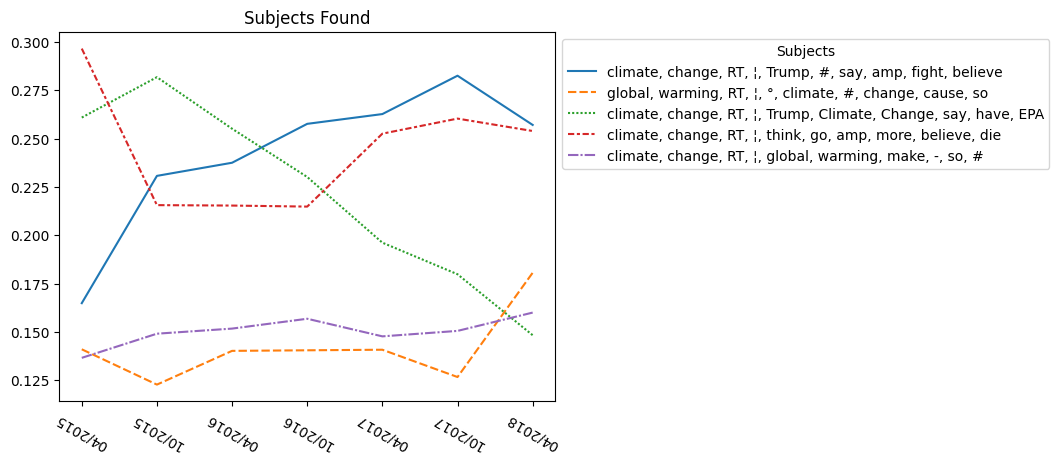

In [39]:
main.plot(
    title = 'Subjects Found',    # Plot's title
    
    legend_title="Subjects",     # Legend's title
    
    # path_to_save="./plot_of_news.png",   # Set location to save
    
    display=True,                # Display graph (default)
    
    rotation=150,                 # Rotate labels in 75º
    
    mode="line",                 # Plot lines (default)
    
    date_format="%m/%Y",         # Set custom date format to MM/YYYY
)
